# Data visualization using seaborn and plotnine

- This short tutorial informally compares the differences among matplotlib, seaborn and plotnine.
- The main goal is to make drawing easier and introduce different styles for visualization, e.g. ggplot2. ggplot2 is graphics library implemented in R language. In python, we can change the style to ggplot2 or instead use the plotnine (python version of ggplot2).
- Note that using different visualization styles might help in your research report or presentation, but this does not mean that they are suitable for journal publication. For journal publication, please follow the journal's instruction.


## Data
Here I used the most common result in our lab, the profile correlation between decoded features and true features for VGG19 model. 

I used the library pandas to read and manipulate the data. Seaborn and plotnine incorporate pandas well such that you need not pass the numpy array to the plotting function.

Figures below are only for visualization purpose.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('profile_corr_vgg19.csv')
df = df.sort_values('Layer')

In [3]:
df.head()

,Accuracy,Layer,Subject
91,0.167501,conv1_1,Sbj 2
72,0.130119,conv1_1,Sbj 5
53,0.148057,conv1_1,Sbj 4
15,0.183328,conv1_1,Sbj 1
34,0.182408,conv1_1,Sbj 3


In [4]:
# Five subjects
df['Subject'].unique()

array(['Sbj 2', 'Sbj 5', 'Sbj 4', 'Sbj 1', 'Sbj 3'], dtype=object)

## Matplotlib
- The most common python graphic library.
- A bit low level (need more lines of codes to create the same figure by other higher level library)

You can set different style with the style options as shown in:  
https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Let's try different styles, like "default", "seaborn", "ggplot"
plt.style.use('default')

Let's plot only one subject decoding accuracy result:

In [7]:
# extract one subject data
df_1sbj = df[df['Subject']=='Sbj 1']

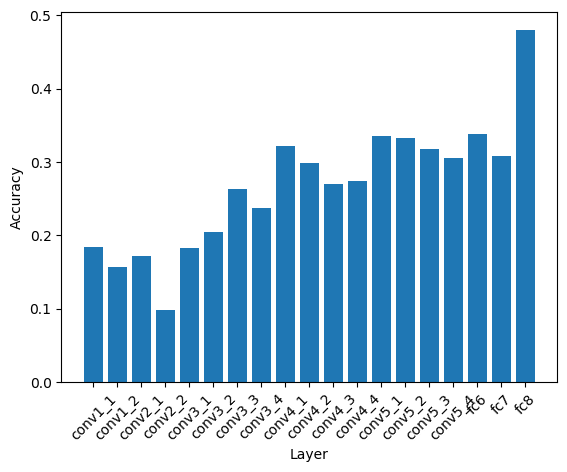

In [8]:
# Plotting
# set up the x axis labels
labels = df_1sbj['Layer'].unique() # unique function will sort the values, so be careful whether it match with y.

# ticks for x axis
x = np.arange(len(labels)) 

# heights for each bar
y = df_1sbj['Accuracy'].values

# ploting
plt.bar(x=x, height=y)
plt.xticks(x,labels=labels, rotation=45)

# add labels for axes
plt.xlabel('Layer')
plt.ylabel('Accuracy');

Plotting a chart using matplotlib has a lot of manual works. It is much complicated to draw a more complex chart. I am not going to draw more charts using matplotlib below.

## Seaborn
- High level than matplotlib
- Easier to use
- Sometimes might have some limitations, but sufficient for our lab presentation.
- Note that anaconda seem to use the 0.9.0 version by default, but the documentation you found might be version 0.11.1. Some functionalities might be different. Here I used version 0.9.0.
- A bit depends on how good you use pandas to manipulate the dataframe.  
- Official tutorial: https://seaborn.pydata.org/tutorial.html

In [9]:
import seaborn as sns

In [10]:
sns.reset_defaults()

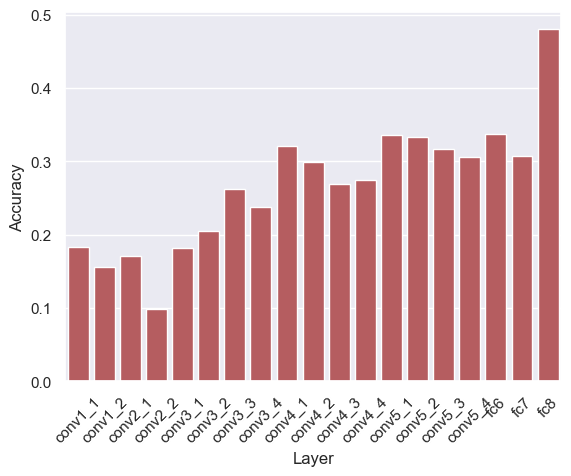

In [11]:
# seaborn also allow to set different styles: white, dark, whitegrid, darkgrid, ticks
sns.set(style="darkgrid")
# Plotting
sub = sns.barplot(data=df_1sbj, x='Layer', y='Accuracy', color='r')
# Rotate the xtick labels
sub.set_xticklabels(sub.get_xticklabels(), rotation=45);

Much simpler than matplotlib, only two line of codes (actually only one if I don't rotate the label).

Let's draw the error bars across subjects:

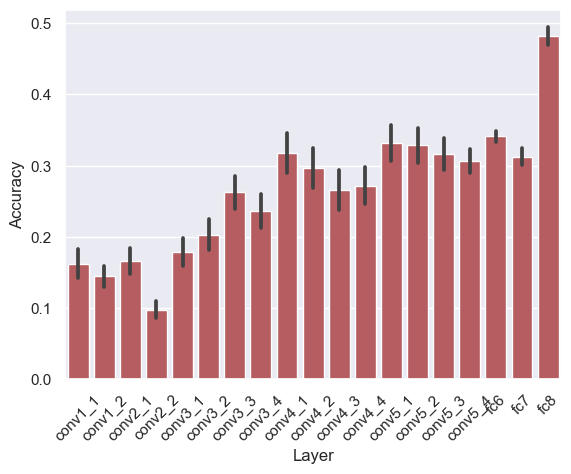

In [12]:
# Here I used the all subject data: df
sub = sns.barplot(data=df, x='Layer', y='Accuracy', color='r', ci='sd')
sub.set_xticklabels(sub.get_xticklabels(), rotation=45);

In fact the codes are the same, seaborn automatically draw the error bars, if there are multiple values for each layer.

What if I don't want averaging data and like to draw all subject data together?

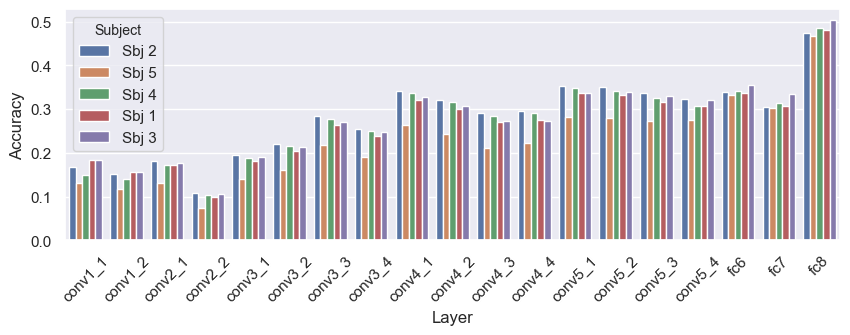

In [13]:
# Adjust figure size to make it nicer.
plt.figure(figsize=(10,3))

# just simply add an argument "hue", it use different colors for every "Subject" category.
sub = sns.barplot(x='Layer', y='Accuracy', data=df, hue='Subject')
sub.set_xticklabels(sub.get_xticklabels(), rotation=45);

Other charts in seaborn have pretty much similar API, you can use them easily if you understand the bar chart drawing above.  
For example, strip plot:

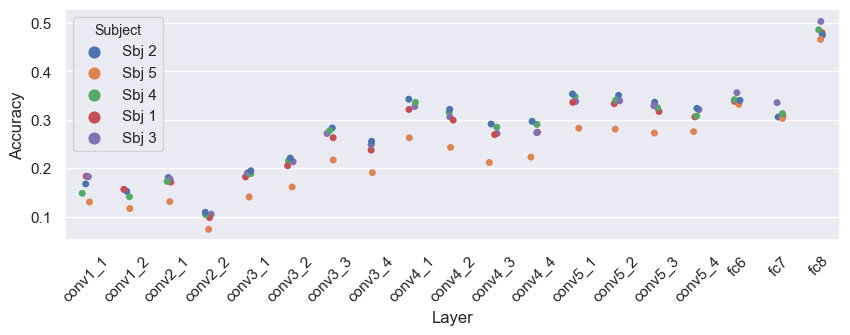

In [14]:
plt.figure(figsize=(10,3))
sub = sns.stripplot(x='Layer', y='Accuracy', data=df, hue='Subject')
sub.set_xticklabels(sub.get_xticklabels(), rotation=45);

Draw each subject separately in different panels:

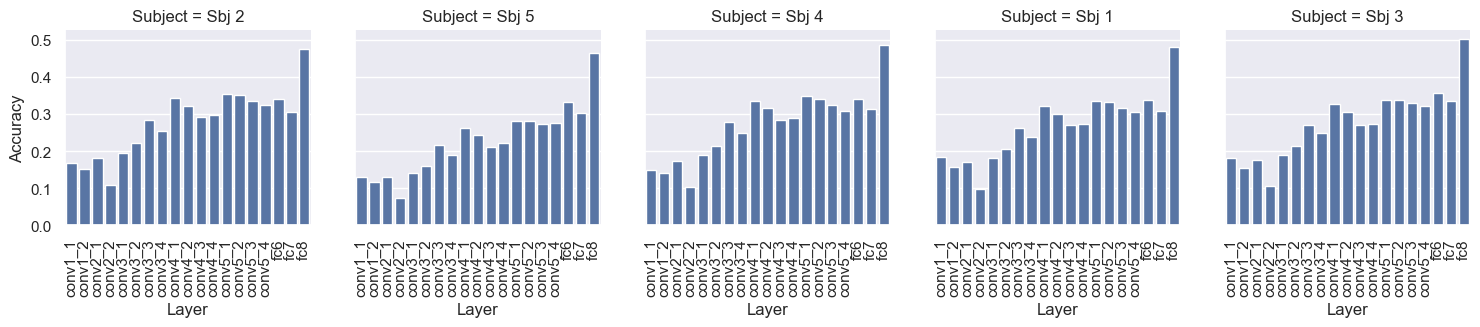

In [15]:
g = sns.FacetGrid(df, col='Subject')
g.map(sns.barplot, 'Layer', 'Accuracy')
g.set_xticklabels(g.axes[0][0].get_xticklabels(),rotation=90);

We also often draw scatter plot, for example:

In [16]:
df_scatter = df.pivot(index='Layer', columns='Subject', values='Accuracy').reset_index()
df_scatter.head()

Subject,Layer,Sbj 1,Sbj 2,Sbj 3,Sbj 4,Sbj 5
0,conv1_1,0.183328,0.167501,0.182408,0.148057,0.130119
1,conv1_2,0.156397,0.152211,0.155701,0.141036,0.116616
2,conv2_1,0.171333,0.180675,0.177390,0.172740,0.130955
3,conv2_2,0.097865,0.108925,0.105140,0.104021,0.073762
4,conv3_1,0.181977,0.194669,0.190112,0.188639,0.140493


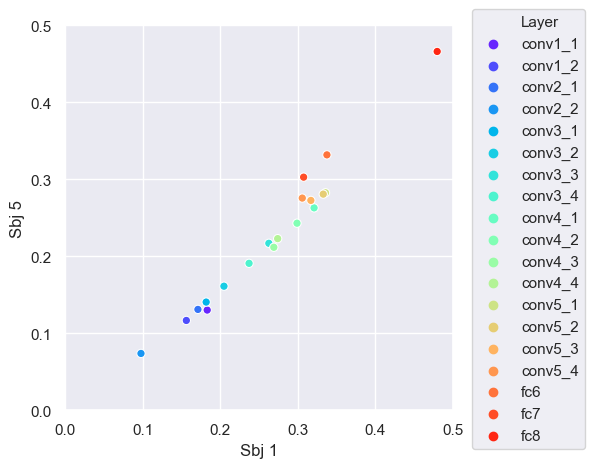

In [17]:
plt.figure(figsize=(5,5))
sub = sns.scatterplot(data=df_scatter, x='Sbj 1', y='Sbj 5', hue='Layer', palette='rainbow')
sub.set_xlim(0,0.5)
sub.set_ylim(0,0.5)
sub.legend(loc=(1.05,-0.1));

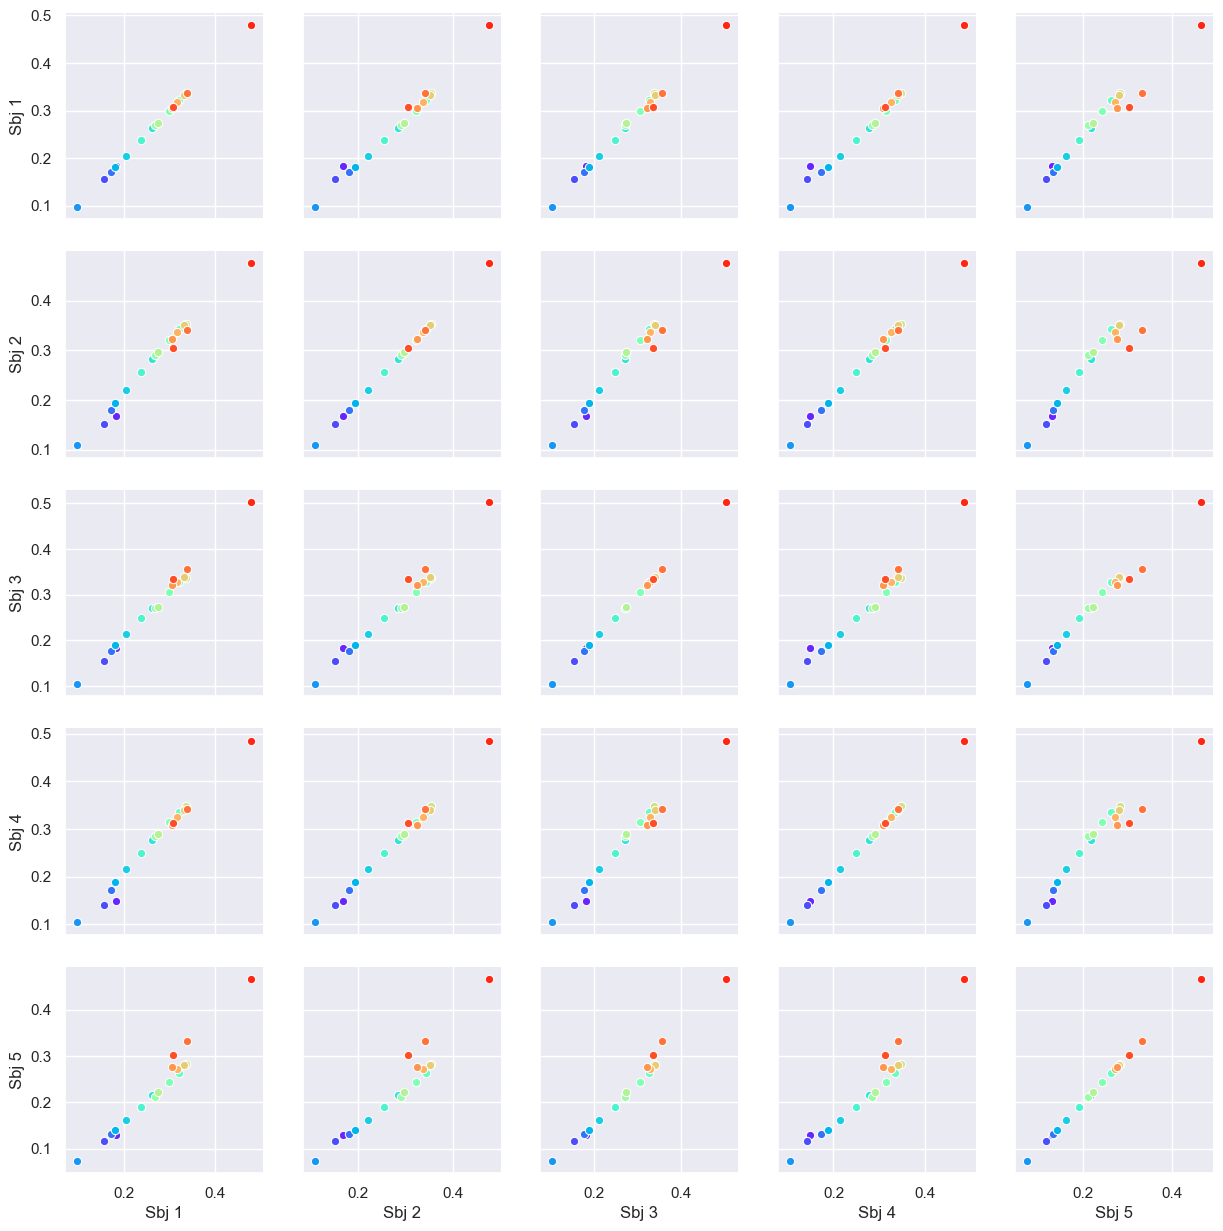

In [18]:
# All pairs
g = sns.PairGrid(df_scatter,hue='Layer', palette='rainbow', )
g.map(sns.scatterplot);

## Plotnine
- Python version of ggplot2 (gg means Grammar of Graphics by Leland Wilkinson)
- The API is kind of similar to R language.
- Also high level than matplotlib.
- One drawback is that the official documentation is not well written.

Every chart consists of three major components: 
1. ggplot: initialize the figure
2. aes: aesthetic mappings
3. geom: geometric object

Ccomponents are linked by "+" signs.

#### Basic formula:

(  
ggplot(data, aes(x=' ', y=' '))  
\+ geom  
\+ another geom  
\+ ...  
)  

or 

(  
ggplot(data)   
\+ geom(aes(x=' ', y=' '))  
\+ another geom  
\+ ...  
)  

or 

(  
ggplot(data)   
\+ aes(x=' ', y=' ')  
\+ geom()  
\+ another geom  
\+ ...  
)  



In [19]:
from plotnine import *

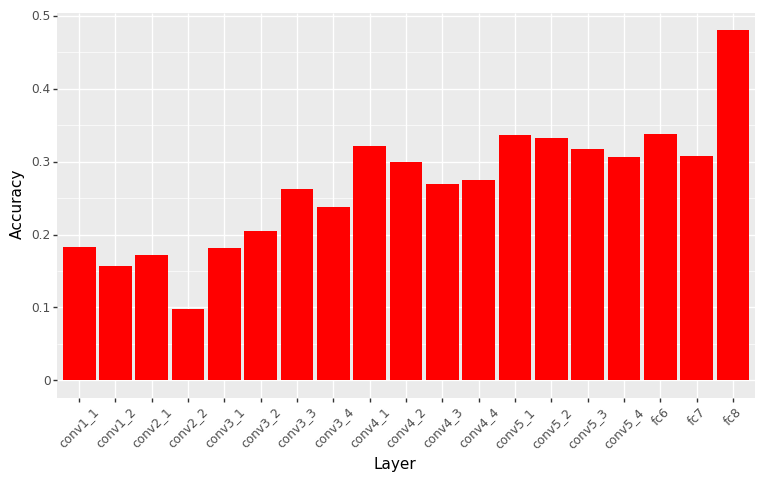

In [20]:
( ggplot(df_1sbj) 
 + aes(x='Layer', y='Accuracy')
 + geom_bar(stat='identity', fill='red') # identity mean do nothing
 + theme(axis_text_x=element_text(rotation=45, hjust=3,vjust=1), # rotate the label and adjust the position
        figure_size=(9,5))
).draw(); # .draw(); is not necessary, here I just want to suppress the annoying output text by jupyter notebook

As far as I know, to draw error bars, you still need to calculate for yourself unlike seaborn:

In [21]:
df_grouped = df.groupby('Layer').agg(['mean', 'sem'])
df_grouped.columns = ['_'.join(col) for col in df_grouped.columns.values]
df_grouped = df_grouped.reset_index()
df_grouped['yerr'] = df_grouped['Accuracy_sem']* 1.96
df_grouped.head()

,Layer,Accuracy_mean,Accuracy_sem,yerr
0,conv1_1,0.162282,0.010276,0.020142
1,conv1_2,0.144392,0.007470,0.014640
2,conv2_1,0.166619,0.009070,0.017777
3,conv2_2,0.097942,0.006301,0.012350
4,conv3_1,0.179178,0.009883,0.019370


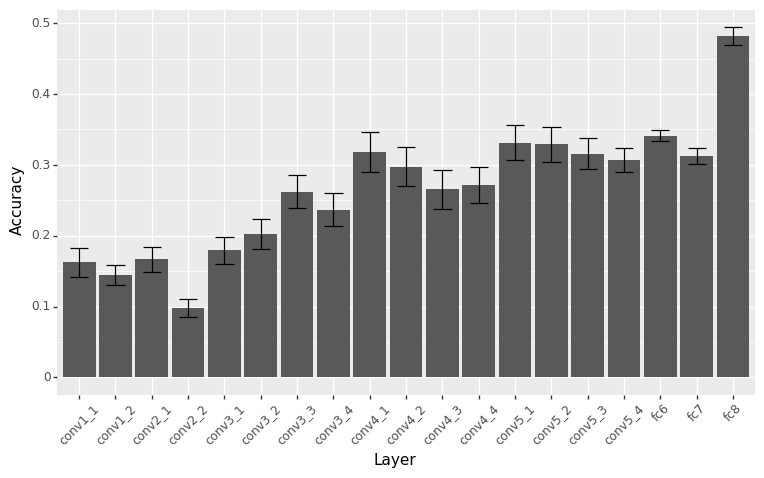

In [22]:
( ggplot(df_grouped) 
 + aes(x='Layer', y='Accuracy_mean')
 + geom_bar(stat='identity')
 + geom_errorbar(aes(ymin='Accuracy_mean - yerr', ymax='Accuracy_mean + yerr'))
 + theme(axis_text_x=element_text(rotation=45, hjust=3,vjust=1),
        figure_size=(9,5))
 + ylab('Accuracy')
 ).draw();

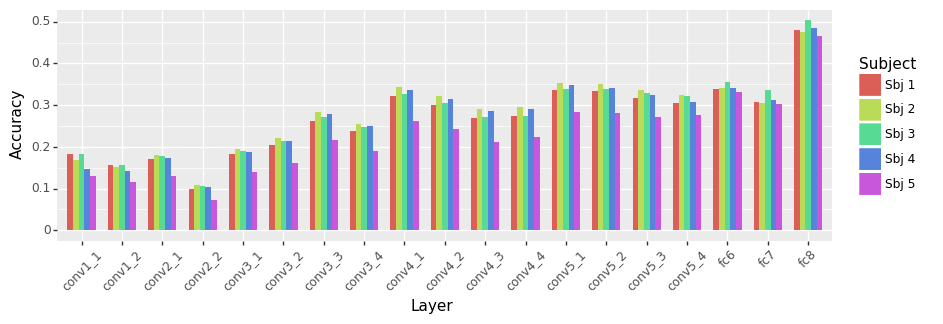

In [23]:
( ggplot(df) 
 + aes(x='Layer', y='Accuracy', fill='Subject')
 + geom_bar(stat='identity', position='dodge',width=0.7 ) # dodge means each subject are drawn at different position
 + theme(axis_text_x=element_text(rotation=45, hjust=3,vjust=1), 
         figure_size=(10,3))
 ).draw();

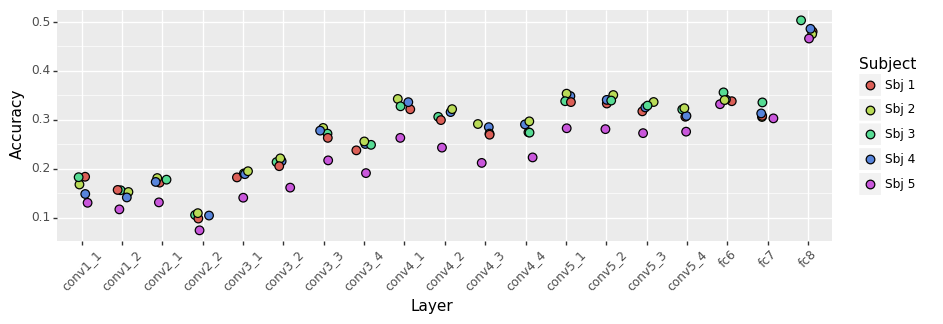

In [24]:
( ggplot(df) 
 + aes(x='Layer', y='Accuracy', fill='Subject')
 + geom_jitter(stat='identity', size=3, position=position_jitter(width=0.2))
 + theme(axis_text_x=element_text(rotation=45, hjust=3,vjust=1), 
         figure_size=(10,3))
 ).draw();

Draw each subject separately in different panels:

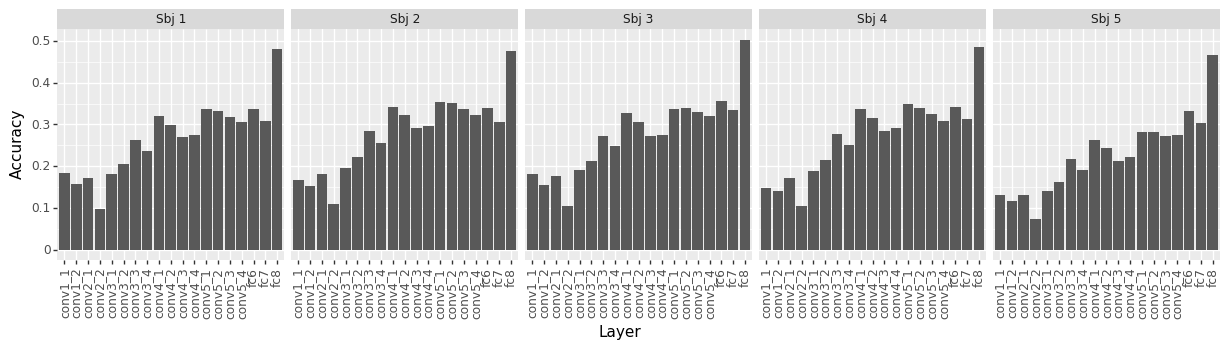

In [25]:
( ggplot(df)
 + facet_grid(facets=('.', 'Subject'))
 + aes(x='Layer', y='Accuracy')
 + geom_bar(stat='identity')
 + theme(axis_text_x=element_text(rotation=90, hjust=3,vjust=1), 
         figure_size=(15,3))
).draw();

Scatterplot

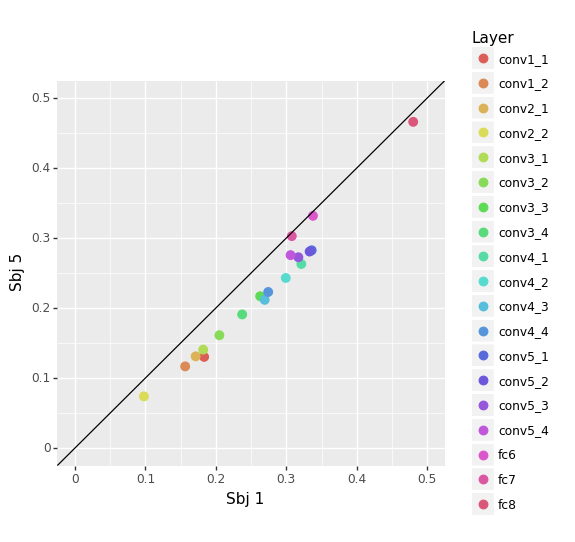

In [26]:
( ggplot(df_scatter) 
 + aes(x='Sbj 1', y='Sbj 5', color='Layer')
 + geom_point(stat='identity', size=3)
 + geom_abline(intercept=0, slope=1) # add diagonal line 
 + xlim(0,0.5)
 + ylim(0,0.5)
 + theme(figure_size=(5,5))
).draw();

#### Other useful functionalities:

Add text on top of bars

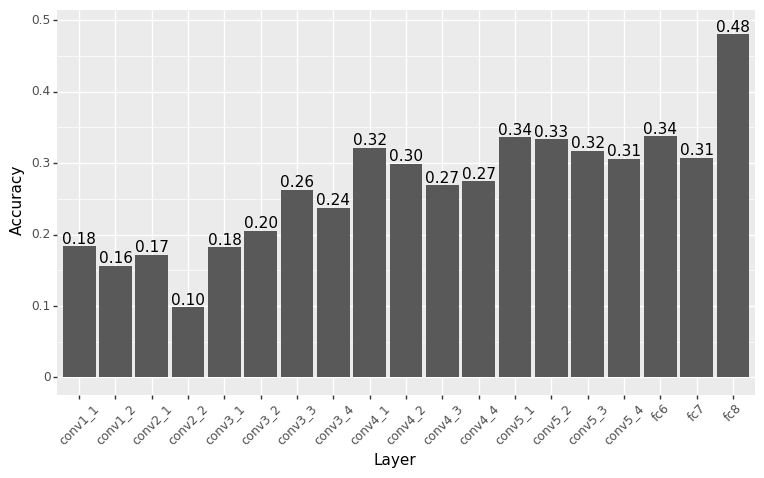

In [27]:
# add text on top of bar and change color
( ggplot(df_1sbj) 
 + aes(x='Layer', y='Accuracy')
 + geom_bar(stat='identity')
 + geom_text(aes(label='Accuracy'),nudge_y=0.01, format_string='{:.2f}') # add text
 + theme(axis_text_x=element_text(rotation=45, hjust=3,vjust=1), 
         figure_size=(9,5))
).draw();

You can also change style in plotnine: theme_bw, theme_seaborn, theme_xkcd, theme_classic ...  
https://plotnine.readthedocs.io/en/stable/api.html#themes

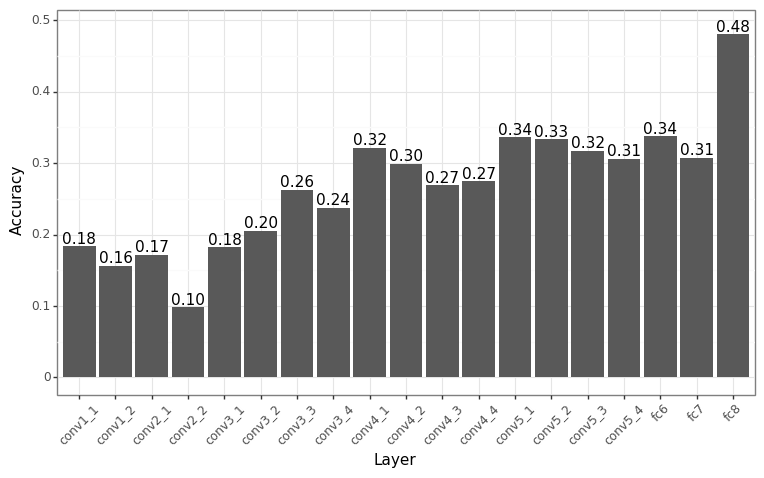

In [28]:
( ggplot(df_1sbj) 
 + aes(x='Layer', y='Accuracy', label='Accuracy')
 + geom_bar(stat='identity') 
 + geom_text(nudge_y=0.01, format_string='{:.2f}') # add text
 + theme_bw() # change style, it has to come before "theme"
 + theme(axis_text_x=element_text(rotation=45, hjust=3,vjust=1), 
         figure_size=(9,5))
).draw();

To save figures as pdf or png, add "save" at the end of the command:

In [29]:
( ggplot(df_1sbj) 
 + aes(x='Layer', y='Accuracy', label='Accuracy')
 + geom_bar(stat='identity') 
 + geom_text(nudge_y=0.01, format_string='{:.2f}') # add text
 + theme(axis_text_x=element_text(rotation=45, hjust=3,vjust=1), 
         figure_size=(9,5))
).save(filename='Profile_corr.png', width=9, height=5, units='in', dpi=300) # save file

# My conclusions
- Avoid matplotlib if possible
- For quick and nice drawing, go for seaborn. Seaborn should be sufficient for our lab report.
- If need to control and adjust each component, plotnine could be a good choice. Plotnine in principle can make pretty much complex figures, but because of the lack of well written documentation, sometimes could be difficult to search for what you intend to draw. If you are a fully Pythonic coder, you need to get used to the syntax of plotnine.
- If none of the above catches your eyes, there are some other libraries available, like plotly or altair, pleace check them out if you feel interested. 